# Text Analysis on Wine Data Using NLP

Wine is a treat that many adults enjoy drinking from time to time. Especially with all the different kinds of wine available to drink, there are things that we may not know. We will be using **winemag-data-130k-v2.csv** from Kaggle as our dataset. 

**Content**

This dataset contains these columns:
* country: The country that the wine is from
* description: description of the wine
* designation: The vineyard within the winery where the grapes that made the wine are from
* points: The number of points WineEnthusiast rated the wine on a scale of 1-100
* price: The cost for a bottle of the wine
* province: The province or state that the wine is from
* region_1: The wine growing area in a province or state
* region_2: Sometimes there are more specific regions specified within a wine growing area, but this value can be blank
* taster_name: Name of wine taster
* taster_twitter_handle: Twitter handle of the wine taster
* title: The title of the wine review, which often contains the vintage.
* variety: The type of grapes used to make the wine
* winery: The winery that made the wine

The goals of this notebook include:

* Finding the relationship between countries and wine ratings
* Analyze title to extract wine vintage date
* Price of wine VS Vintage date
* See if variety of grapes affect the selling price of the wine
* Exploring wine descriptions using NLP


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
reviews = pd.read_csv('winemag-data-130k-v2.csv')
reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


# Data Cleaning for Vintage Years

In [4]:
reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
#Drop any duplicate entries as there would already be a copy of it in the dataset.
reviews = reviews.drop_duplicates()

We will check for NaN/None values in country, price, and points. As we are analyzing these points specifically, we do not want any NaN/none values present. So if they are present, we will remove those rows with the NaN values. Once we have checked those, we will take a look at the rest of the data to see if any more cleaning needs to be done.

In [6]:
reviews[pd.isnull(reviews['country'])]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
11150,11150,NaN,"A blend of 85% Melnik, 10% Grenache Noir and 5...",NaN,89,20.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2013 Melnik,Melnik,Orbelus
11348,11348,NaN,"Light and fruity, this is a wine that has some...",Partager,82,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager White,White Blend,Barton & Guestier
14030,14030,NaN,"This Furmint, grown in marl soils, has aromas ...",Márga,88,25.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,St. Donat 2013 Márga White,White Blend,St. Donat
16000,16000,NaN,"Jumpy, jammy aromas of foxy black fruits are s...",Valle de los Manantiales Vineyard,86,40.0,NaN,NaN,NaN,Michael Schachner,@wineschach,Familia Deicas 2015 Valle de los Manantiales V...,Tannat,Familia Deicas
16749,16749,NaN,Winemaker: Bartho Eksteen. This wooded Sauvy s...,Cape Winemakers Guild Vloekskoot Wooded,91,NaN,NaN,NaN,NaN,Lauren Buzzeo,@laurbuzz,Bartho Eksteen 2016 Cape Winemakers Guild Vloe...,Sauvignon Blanc,Bartho Eksteen


In [7]:
reviews = reviews.dropna(axis=0, how='any', subset=['country'])

In [8]:
reviews[pd.isnull(reviews['price'])]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
30,30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,NaN,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone
31,31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta
50,50,Italy,This blend of Nero d'Avola and Syrah opens wit...,Scialo,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Viticultori Associati Canicatti 2008 Scialo Re...,Red Blend,Viticultori Associati Canicatti
54,54,Italy,"A blend of Nero d'Avola and Nerello Mascalese,...",Rosso,85,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Corvo 2010 Rosso Red (Sicilia),Red Blend,Corvo
79,79,Portugal,"Grown on the sandy soil of Tejo, the wine is t...",Bridão,86,NaN,Tejo,NaN,NaN,Roger Voss,@vossroger,Adega Cooperativa do Cartaxo 2014 Bridão Touri...,Touriga Nacional,Adega Cooperativa do Cartaxo
137,137,South Africa,"This is great Chenin Blanc, wood fermented but...",Hope Marguerite,90,NaN,Walker Bay,NaN,NaN,Roger Voss,@vossroger,Beaumont 2005 Hope Marguerite Chenin Blanc (Wa...,Chenin Blanc,Beaumont
159,159,Italy,"Intense aromas of ripe red berry, menthol, esp...",Filo di Seta,91,NaN,Tuscany,Brunello di Montalcino,NaN,Kerin O’Keefe,@kerinokeefe,Castello Romitorio 2011 Filo di Seta (Brunell...,Sangiovese,Castello Romitorio


In [9]:
reviews = reviews.dropna(axis=0, how='any', subset=['price'])

In [10]:
reviews[pd.isnull(reviews['points'])]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery


Here, we will drop columns of data that we do not need.

Columns:
* taster_name
* taster_twitter_handle
* province
* designation
* Unnamed: 0

In [11]:
reviews.drop('taster_name',axis=1, inplace=True)
reviews.drop('taster_twitter_handle', axis=1, inplace=True)
reviews.drop('province', axis=1, inplace=True)
reviews.drop('designation',axis=1,inplace=True)
reviews.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
reviews.head()

,country,description,points,price,region_1,region_2,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Navarra,NaN,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


If you look at the title, we can see a year within that. That year indicates the vintage. Vintage, in winemaking, is the process of picking grapes and created the finished product: wine. A vintage wine is one made from grapes that were all, or primarily, grown and harvested in a single specified year.

We will extract the year out of the title and create a new column for it so that we can do some data analysis with it. Since the current year is 2019, we are filtering out any numbers above as it would not indicate a correct year. For this, we will take a look at all the vintage dates from the year 2000 to present.

In [13]:
#function to extract vintage
def vintage_extraction(title):
    words = title.split()
    for i in range(len(words)):
        if words[i].isdigit() and int(words[i]) >= 2000 and int(words[i]) <= 2019:
            return words[i]

In [14]:
reviews['vintage'] = reviews['title'].apply(vintage_extraction)

In [15]:
reviews['vintage'].value_counts()

2013    15187
2014    14876
2012    14736
2011    11436
2010    11105
2015     9621
2009     9056
2008     6725
2007     6498
2006     5170
2016     3543
2005     3293
2004     1604
2000      735
2001      668
2003      499
2002      333
2017       11
Name: vintage, dtype: int64

In [16]:
reviews[pd.isnull(reviews['vintage'])]

,country,description,points,price,region_1,region_2,title,variety,winery,vintage
63,France,"This fat, yeasty Champagne is comprised predom...",86,58.0,Champagne,NaN,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion,None
69,France,"This cooperative, based in Aÿ, has benefited f...",86,55.0,Champagne,NaN,Collet NV Brut Rosé (Champagne),Champagne Blend,Collet,None
237,Italy,The wine boasts a beautiful appearance thanks ...,85,18.0,San Marino,NaN,Consorzio Vini Tipici di San Marino NV Moscato...,Moscato,Consorzio Vini Tipici di San Marino,None
315,Italy,"Honey, almond blossom and citrus zest are foll...",86,15.0,Prosecco di Valdobbiadene,NaN,Bellussi NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Bellussi,None
326,Italy,Drying mineral tones face off with luscious pe...,86,15.0,Prosecco di Valdobbiadene,NaN,Marsuret NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Marsuret,None
332,Italy,This Prosecco Brut from the slightly warmer Co...,86,19.0,Prosecco di Conegliano,NaN,Sommariva NV Palazzo Rosso Brut (Prosecco di ...,Prosecco,Sommariva,None
333,Italy,This crisp sparkler is characterized by drying...,86,18.0,Prosecco di Valdobbiadene,NaN,Spagnol NV Col del Sas Extra Dry (Prosecco di...,Prosecco,Spagnol,None
334,France,"A ripe, fruity wine that takes its raspberry f...",86,42.0,Champagne,NaN,Jacquart NV Mosaïque Rosé Brut (Champagne),Champagne Blend,Jacquart,None
339,Spain,"Red in color, with berry and apple aromas, thi...",82,13.0,Cava,NaN,Cavas Hill NV 1887 Rosado Sparkling (Cava),Sparkling Blend,Cavas Hill,None
342,Spain,"Funky, yeasty aromas of cinnamon, spent lees a...",82,11.0,Cava,NaN,Bellisco NV Sparkling (Cava),Sparkling Blend,Bellisco,None


In [17]:
reviews = reviews.dropna(axis=0, how='any', subset=['vintage'])

In [18]:
reviews.head()

,country,description,points,price,region_1,region_2,title,variety,winery,vintage
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Navarra,NaN,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011


As seen in the dataframe above, the vintage years are not in order. So we will need to sort all the rows so that the vintage years are sorted as this will appear cleaner when we start to graph the data.

In [19]:
reviews.sort_values(by=['vintage'], inplace=True)

# Vintage Analysis

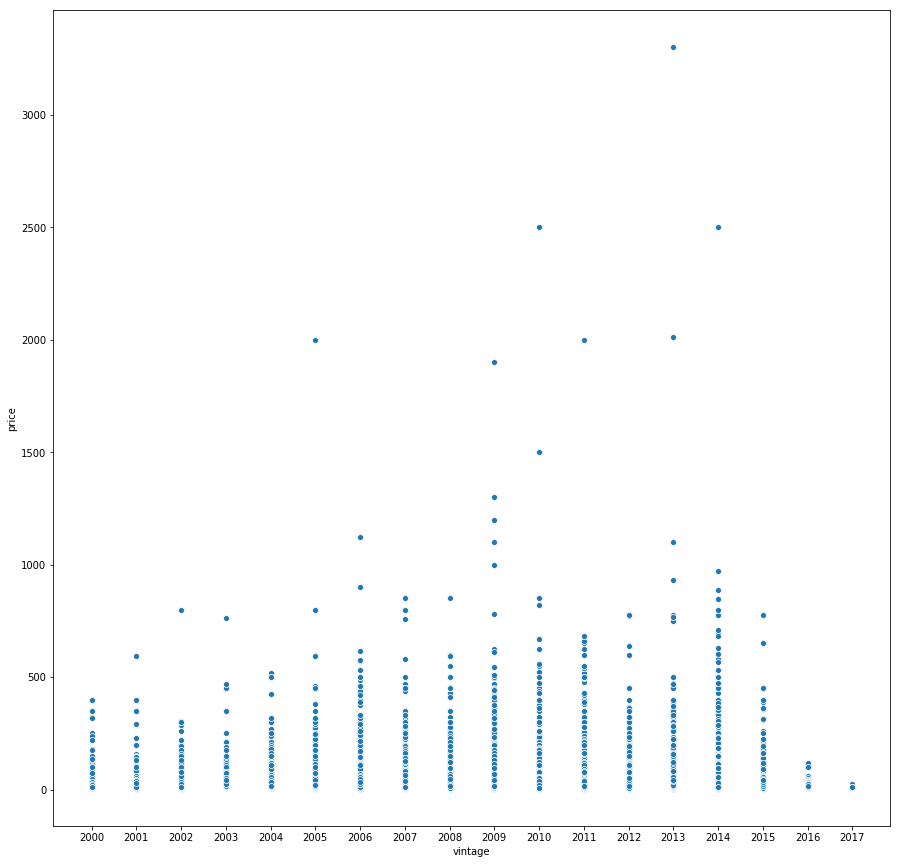

In [20]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='vintage',y='price',data=reviews, palette='')

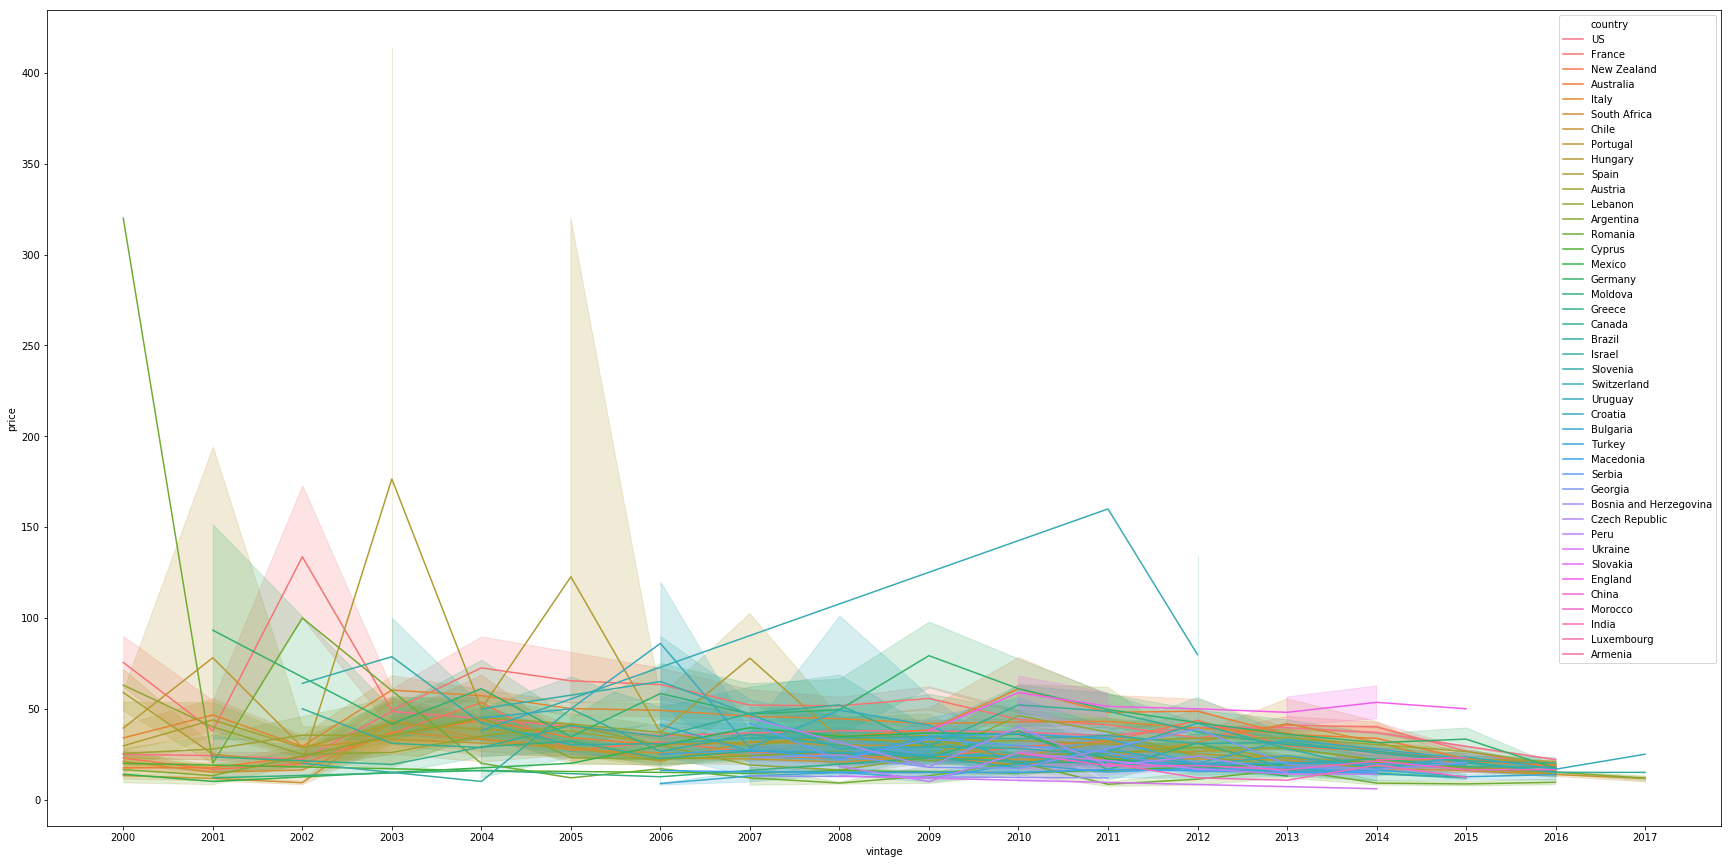

In [21]:
plt.figure(figsize=(30,15))
sns.lineplot(x='vintage',y='price',data=reviews,hue='country')

Insert analysis here once complete

# Text Preprocessing

In [22]:
import string
from nltk.corpus import stopwords

In [23]:
def process_text(reviews):
    nopunc = [char for char in reviews if char not in string.punctuation]
    nopunc = "".join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
bow_transformer = CountVectorizer(analyzer=process_text).fit(reviews['description'])
print(len(bow_transformer.vocabulary_))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Tony/nltk_data'
    - 'D:\\Anaconda\\nltk_data'
    - 'D:\\Anaconda\\share\\nltk_data'
    - 'D:\\Anaconda\\lib\\nltk_data'
    - 'C:\\Users\\Tony\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
description_bow = bow_transformer.transform(reviews['description'])

In [ ]:
#print('Shape of Sparse Matrix: ', description_bow.shape)
#print('Amount of Non-Zero occurences: ', description_bow.nnz)

In [ ]:
#sparsity = (100.0 * description_bow.nnz / (description_bow.shape[0] * description_bow.shape[1]))
#print('sparsity: {}'.format(round(sparsity)))

# TF-IDF

In [ ]:
#from sklearn.feature_extraction.text import TfidfTransformer